# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Veni Agustina Pratama Putri
- Email: veniapputrii@gmail.com
- Id Dicoding: veniapputrii

## Menentukan Pertanyaan Bisnis

- Customer yang berkemungkinan memiliki nilai konsumtif yang tinggi terletak di kota mana?
- Measurable : Jenis Payment apa yang paling banyak digunakan oleh customer?
- Di bulan apa pengiriman produk terlama?

## Menyiapkan semua library yang dibutuhkan

---


Melakukan instalasi ekstensi
numpy, pandas, matplotlip.pyplot

*   Numpy untuk komputasi numerik dan pengolahan array multidimensi.
*   Pandas untuk manipulasi dan analisis data tabular (seperti DataFrame) dengan cara yang efisien.
*   Matplotlip.pyplot untuk membuat visualisasi data, seperti grafik garis, grafik batang, scatter plots, dan lainnya.






In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ✍️ **Data Wrangling**




##**Gathering Data**

⭐ Mengimpor dataset : *Order_payments_dataset*
Nantinya, dataset ini akan saya gunakan untuk melihat jenis payment apa yang sering pelanggan gunakan untuk pembayaran.

In [ ]:
#Mengimpor data dari computer local ke drive
from google.colab import files
uploaded = files.upload()


Saving order_payments_dataset.csv to order_payments_dataset.csv


In [ ]:
#membaca data menggunakan .read_csv()
payments_df = pd.read_csv('order_payments_dataset.csv')


In [ ]:
#menampilkan dataset menggunakan .head()
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


⭐ Import dataset : *customers_dataset.csv*

Saya menggunakan dataset ini untuk mengetahui 5 kota terbanyak yang sering belanja di e-commerce kita

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customers_dataset.csv to customers_dataset.csv


In [ ]:
#membaca dataset menggunakan .read_csv()
customers_df = pd.read_csv('customers_dataset.csv')

In [ ]:
#menampilkan dataset menggunakan .head()
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


⭐ Import dataset : *Orders_dataset.csv*

Dataset ini akan digunakan untuk mengetahui rata2 waktu pengiriman produk disetiap bulannya

In [2]:
from google.colab import files
uploaded = files.upload()

Saving orders_dataset.csv to orders_dataset.csv


In [7]:
orders_df = pd.read_csv('orders_dataset.csv')

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



## **Assessing Data**
Penilaian data

⭐ Menampilkan informasi dataset Payments

In [ ]:
#mencoba melihat tipe data & missing value dari setiap kolom/atribut menggunakan .info()
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


⭐ Memeriksa duplikasi data

In [ ]:
#melihat apakah ada duplikasi pada dataset payments_df dengan menggunakan kode berikut :
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


⭐ Menampilkan nilai statistik data payments





In [ ]:
#menggunakan .describe()
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


⭐ Melihat tipe data pada setiap atribut yang ada di dataset customers_df

In [ ]:
#menggunakan .info()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


⭐ Melihat nilai yang duplikat

In [ ]:
#memeriksa duplikasi pada dataset customer menggunakan code berikut :
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


⭐ Melihat nilai statistik pada dataset customers_df

In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


⭐ Penilaian data untuk orders dataset


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


✨ Insight : Terdapat Missing Value pada atribut order_approve_at, order_delivered_carrier_date, order_delivered_customer_date & Tipe Data tidak sesuai dengan karakteristik nilai pada semua atribut kecuali kolom order_id, customer_id, order_status

⭐ Memastikan missing value

In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

✨ Insight : Terdapat missing value pada atribut order_approved_at, order_delivered_carrier_data, & order_delivered_customer_date

⭐ Memastikan nilai yang duplikat

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


⭐ Mendeskripsikan nilai pada data

In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## **Cleaning Data**

⭐ Menampilkan nilai yang hilang pada atribut order_delivered_carrier_date

In [8]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


⭐ Menampilkan nilai yang hilang pada atribut order_approved_at

In [9]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


⭐ Melihat nilai yang sering muncul pada atribut order_aproved_at

In [10]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

⭐ Mengganti missing value dengan nilai terdekat yang ada dibawahnya menggunakan  method='bfill'

parameter inplace=True digunakan untuk menentukan apakah operasi pengisian nilai yang hilang harus diterapkan pada DataFrame itu sendiri

Parameter fillna digunakan untuk mengisi nilai yang hilang (NaN atau null) dalam DataFrame dengan nilai tertentu.

In [ ]:
orders_df.fillna(method='bfill', inplace=True)

In [ ]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


⭐ Merubah tipe data String menjadi Datetime

In [12]:
#membuat daftar yang digunakan untuk menyimpan nama-nama kolom dalam DataFrame yang mengandung data tanggal & waktu
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
#Melakukan looping (for)  untuk mengiterasi melalui daftar datetime_columns karena terdapat beberapa kolom yang harus diubah menjadi tipe data datetime dalam DataFrame orders_df
#Fungsi Column digunakan untuk mengambil daftar kolom yang ada pada datetime_columns
for column in datetime_columns:
#Mengubah kolom-kolom tertentu dalam DataFrame orders_df menjadi tipe data datetime secara berulang kali.
  orders_df[column] = pd.to_datetime(orders_df[column])

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


⭐ Memeriksa tipe data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## ✍️ **Exploratory Data Analysis (EDA)**

**Pertanyaan**


*   Kota mana yang paling banyak memiliki customer terbanyak?
*   Jenis payment yang sedikit digunakan oleh customer ?
*   Berapa rata-rata waktu pengiriman produk setiap bulannya?



### Explore ...

**Pertanyaan**


*   Di bulan apa pengiriman produk terlama?



In [19]:
# Menghitung selisih waktu antara pengiriman pelanggan dan pengiriman carrier lalu menempatkannya pada kolom baru bernama delivery_time
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']

# Mengelompokkan berdasarkan bulan lalu menempatkannya pada kolom baru yaitu delivery_month
orders_df['delivery_month'] = orders_df['order_delivered_customer_date'].dt.to_period('M')

#Mengubah index dari average_delivery_time_per_month menjadi format tanggal
average_delivery_time_per_month.index = average_delivery_time_per_month.index


In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99281 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   delivery_time                  96475 non-null  timedelta64[ns]
 9   delivery_month                 96476 non-null  period[M]      
dtypes: datetime64[ns](5), object(3), period[M](1), timedelta64[ns](1)
memo

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Pertanyaan**


*   Kota mana yang paling banyak memiliki customer terbanyak?


In [ ]:
df = pd.DataFrame(customers_df)

# Melakukan groupby pada kolom 'Category' dan menghitung jumlah baris dalam setiap kelompok
customerc = df.groupby('customer_city').size().reset_index(name='Count')
#lalu mengurutkan nilai yang paling besar
sorted_df = customerc.sort_values(by='Count', ascending=False)

print(sorted_df)

       customer_city  Count
3597       sao paulo  15540
3155  rio de janeiro   6882
453   belo horizonte   2773
558         brasilia   2131
1143        curitiba   1521
...              ...    ...
1578          ibiara      1
3164      rio espera      1
3163  rio dos indios      1
3162  rio dos cedros      1
2059          lagoao      1

[4119 rows x 2 columns]


In [ ]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Pertanyaan**



*   Jenis payment yang paling banyak digunakan oleh customer ?



In [ ]:
payments = pd.DataFrame(payments_df)

# Melakukan groupby pada kolom 'Category' dan menghitung jumlah baris dalam setiap kelomp
pay = payments.groupby('payment_type').size().reset_index(name='Count')
#Lalu mengurutkan tipe pembayaran mulai dari yang paling banyak digunakan hingga paling sedikit digunakan
sort = pay.sort_values(by='Count', ascending=False)

print(sort)

  payment_type  Count
1  credit_card  76795
0       boleto  19784
4      voucher   5775
2   debit_card   1529
3  not_defined      3


**other EDA**

Melakukan penggabungan dataset orders_df dengan payments_df menggunakan prameter order_id menjadi all_df

In [ ]:
all_df = pd.merge(
    left=orders_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_month,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2017-10,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2017-10,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2017-10,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,2018-08,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,2018-08,1.0,credit_card,3.0,179.12


Melakukan penggabungan dataset all_df dengan customers_df menggunakan prameter customer_id menjadi fix_df

In [ ]:
fix_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
fix_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_month,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2017-10,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2017-10,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,2017-10,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,2018-08,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,2018-08,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [ ]:
fix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       103887 non-null  object         
 1   customer_id                    103887 non-null  object         
 2   order_status                   103887 non-null  object         
 3   order_purchase_timestamp       103887 non-null  datetime64[ns] 
 4   order_approved_at              103887 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   103887 non-null  datetime64[ns] 
 6   order_delivered_customer_date  103887 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns] 
 8   delivery_time                  103887 non-null  timedelta64[ns]
 9   delivery_month                 103887 non-null  period[M]      
 10  payment_sequential             103886 non-null  float64 

Export Data

In [ ]:
fix_df.to_csv("fix_data.csv", index=False)

## ✍️ **Visualization & Explanatory Analysis**




Membuat Line chart


**Pertanyaan**


* Di bulan apa pengiriman produk terlama?


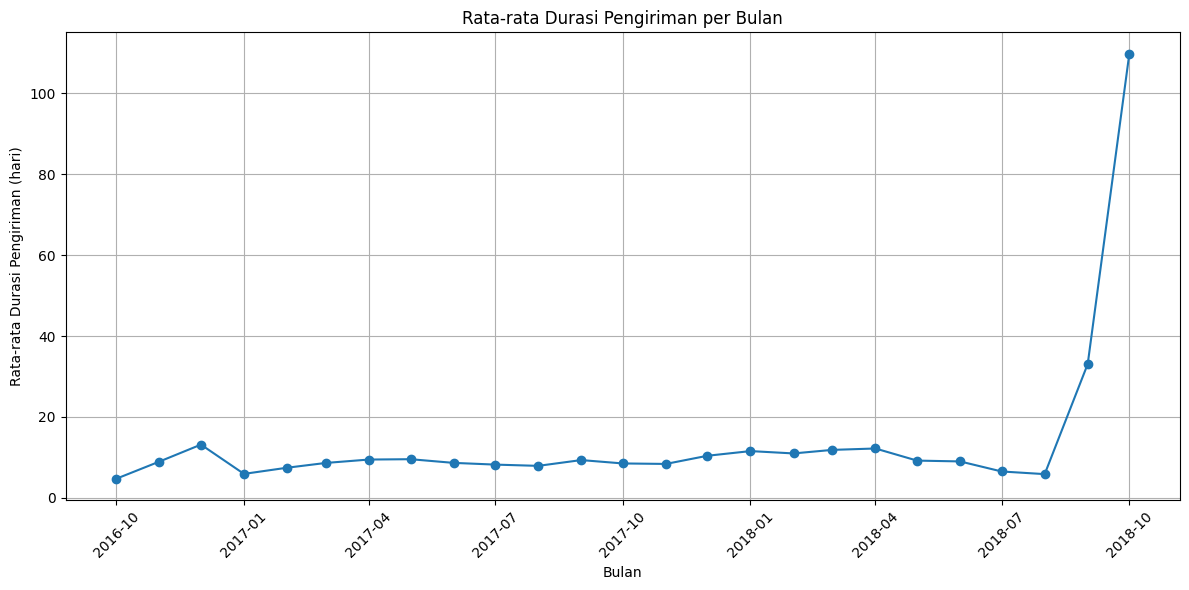

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(average_delivery_time_per_month.index, average_delivery_time_per_month.dt.total_seconds() / (3600 * 24), marker='o', linestyle='-')
plt.title('Rata-rata Durasi Pengiriman per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Durasi Pengiriman (hari)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan grafik
plt.show()

**Pertanyaan**


*   Kota mana yang paling banyak memiliki customer terbanyak?


Membuat pie Chart

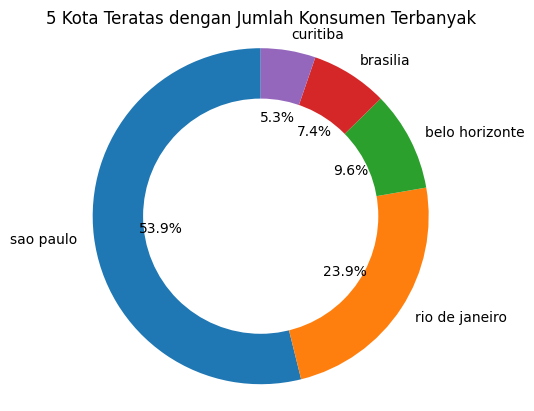

In [ ]:
data = {'customer_city' : ['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba'],
        'Count' : [15540,6882, 2773, 2131, 1521]}
sorted_df = pd.DataFrame(data)
fig, ax = plt.subplots()
ax.pie(sorted_df['Count'], labels=sorted_df['customer_city'], autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# Menambahkan judul
plt.title('5 Kota Teratas dengan Jumlah Konsumen Terbanyak')

# Menampilkan Donut Chart
plt.axis('equal')
plt.show()

**Pertanyaan**


*   Jenis payment yang banyak digunakan oleh customer ?



Membuat Bar Chart

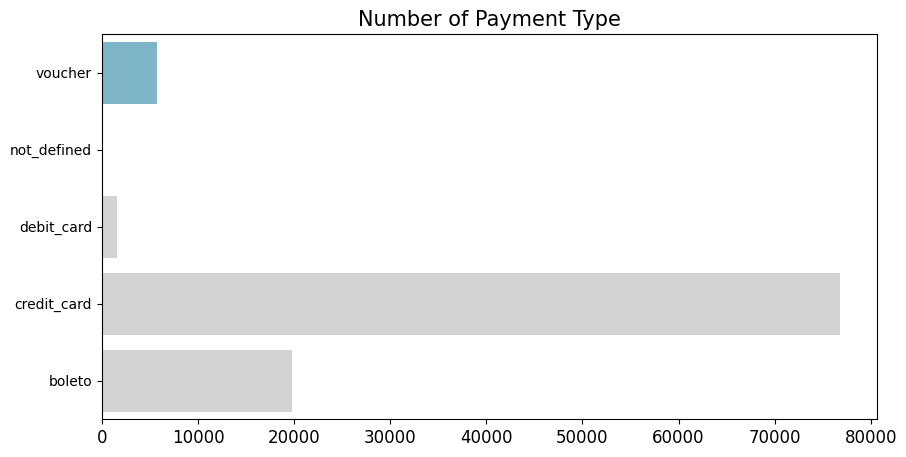

In [ ]:
payments = pd.DataFrame(payments_df)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
pay = payments.groupby(by="payment_type").order_id.count().reset_index()

pay.rename(columns={
    "order_id": "order_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="payment_type",
    x="order_count",
    data=pay.sort_values(by="payment_type", ascending=False),
    palette=colors
)

plt.title("Number of Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()



## ✍️ **Conclusion**


* Customer yang berkemungkinan memiliki nilai konsumtif yang tinggi terletak di
kota mana?
Dari data hasil visualisasi diatas, kota Sao Paulo menjadi kota terbanyak yang sering melakukan pembelian di e-commerce ini

* Measurable : Jenis Payment apa yang paling banyak digunakan oleh customer?
Jenis payment terbanyak yang sering digunakan oleh customer adalah credit card

* Di bulan apa pengiriman produk terlama?
Rata-rata pengiriman produk paling lama di bulan oktober